Maritza Vania Adelia

23/517643/TK/56944

Eigenvalues:
[-0.2  -0.25 -0.5 ]

Eigenvectors:
[[ 0.          0.          0.35856858]
 [ 0.          0.19611614 -0.71713717]
 [ 1.         -0.98058068  0.5976143 ]]


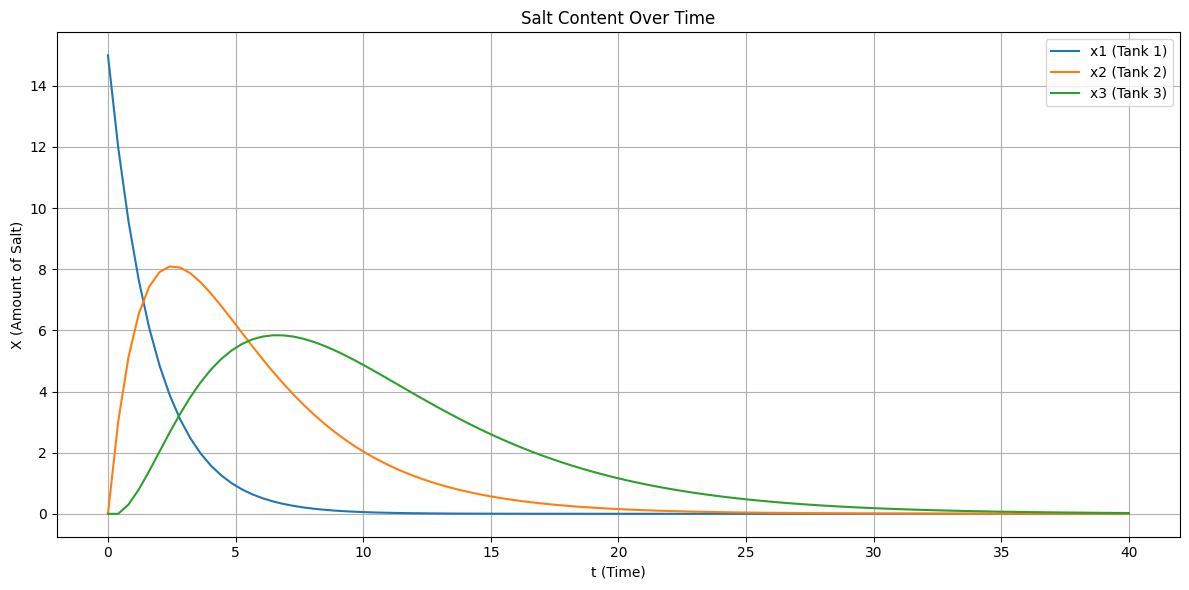

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of differential equations
def model(x, k1, k2, k3):
    x1, x2, x3 = x
    dxdt1 = -k1 * x1
    dxdt2 = k1 * x1 - k2 * x2
    dxdt3 = k2 * x2 - k3 * x3
    return np.array([dxdt1, dxdt2, dxdt3])

# Define each parameter
r = 10
V1 = 20
V2 = 40
V3 = 50

# Calculate each k
k1 = r / V1
k2 = r / V2
k3 = r / V3

# Define the system matrix
A = np.array([[-k1, 0, 0],
              [k1, -k2, 0],
              [0, k2, -k3]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Print eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

# Define initial condition
X0 = np.array([15, 0, 0])

# Time range and step size
t_start, t_end = 0, 40
num_points = 100
t_eval = np.linspace(t_start, t_end, num_points)
dt = t_eval[1] - t_eval[0]

# Initialize solution array
solution = np.zeros((len(t_eval), len(X0)))
solution[0] = X0

# Numerical integration using Euler's method
for i in range(1, len(t_eval)):
    solution[i] = solution[i - 1] + model(solution[i - 1], k1, k2, k3) * dt

# Plot the results
plt.figure(figsize=(12, 6))

# Plot of the salt content over time
plt.plot(t_eval, solution[:, 0], label="x1 (Tank 1)")
plt.plot(t_eval, solution[:, 1], label="x2 (Tank 2)")
plt.plot(t_eval, solution[:, 2], label="x3 (Tank 3)")
plt.xlabel("t (Time)")
plt.ylabel("X (Amount of Salt)")
plt.title("Salt Content Over Time")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()